# Word Cloud Visualization

The objective of this notebook is to explore the common words and themes that exist in the cleaned, r/WorldNews dataset. We choose word cloud visualizations to highlight and discover the overarching themes in the top 25 headlines. We then proceed to investigate frequent words on days where the DJIA increased or decreased in value, along with the variance in frequent words between Top 1 and Top 20 headlines. 

### Import Relevant Packages

In [5]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

### Prepare Data

In [7]:
dataset = pd.read_csv('finished_without_irregular.csv')

In [10]:
news = " ".join(headline for headline in dataset['News'])

### Word Cloud Visualization

This wordcloud function takes a string and converts it into a word cloud object, given a preset list of stopwords.

In [66]:
def wordcloud(text):
    text = text
    stopwords = set(STOPWORDS)
    stopwords.update(["say", "new", "will", "year", "one", "two"])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white", 
                      collocations=False, 
                      max_words=100, 
                      stopwords=stopwords
                     ).generate(text)
    
    return wordcloud

The top 100 words are presented in the word cloud, where more frequent occuring words are larger in size. We can see below common themes revolving around international politics (world governments) and some tragedy or conflict (death, war, attack, etc.).

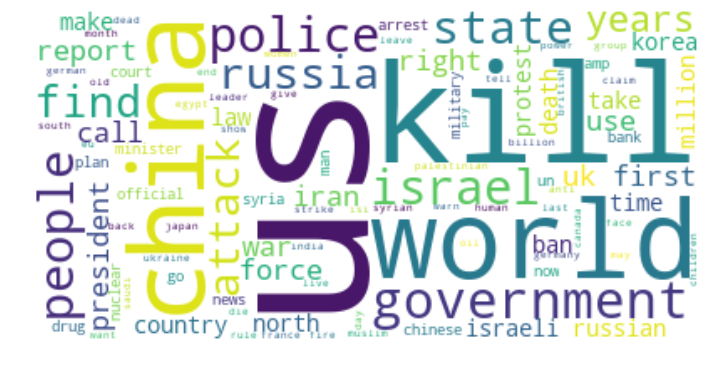

In [37]:
# Print out word cloud for All Headlines
wordcloud(news)

## Word Cloud Visualizations by Ranked Headlines, and Positive or Negative DJIA Performance

We extract words from the Top1, Top20, Positive, and Negative headlines, and analyze the wordclouds to see if there are any visible differences in the prominent themes and word occurences.

In [33]:
# Read headlines with original, cleaned columns
original = pd.read_csv('cleaned_original.csv')

In [34]:
original.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,georgia down two russian warplanes as countrie...,break musharraf to be impeach,russia today columns of troop roll into south ...,russian tank be move towards the capital of so...,afghan children rap with impunity u n official...,russian tank have enter south ossetia whilst g...,break georgia invade south ossetia russia warn...,the enemy combatent trials be nothing but a sh...,...,georgia invade south ossetia if russia get inv...,al qaeda face islamist backlash,condoleezza rice the us would not act to preve...,this be a busy day the european union have app...,georgia will withdraw soldier from iraq to hel...,why the pentagon think attack iran be a bad id...,caucasus in crisis georgia invade south ossetia,indian shoe manufactory and again in a series ...,visitors suffer from mental illnesses ban from...,no help for mexicos kidnap surge
1,2008-08-11,1,why wont america and nato help us if they wont...,bush put foot down on georgian conflict,jewish georgian minister thank to israeli trai...,georgian army flee in disarray as russians adv...,olympic open ceremony fireworks fake,what be the mossad with fraudulent new zealand...,russia anger by israeli military sale to georgia,an american citizen live in s ossetia blame u ...,...,israel and the us behind the georgian aggression,do not believe tv neither russian nor georgian...,riot be still go on in montreal canada because...,china to overtake us as largest manufacturer,war in south ossetia pics,israeli physicians group condemn state torture,russia have just beat the unite state over the...,perhaps the question about the georgia russia ...,russia be so much better at war,so this be what its come to trade sex for food
2,2008-08-12,0,remember that adorable year old who sing at th...,russia end georgia operation,if we have no sexual harassment we would have ...,al qaeda be lose support in iraq because of a ...,ceasefire in georgia putin outmaneuver the west,why microsoft and intel try to kill the xo lap...,stratfor the russo georgian war and the balanc...,im try to get a sense of this whole georgia ru...,...,u s troop still in georgia do you know they be...,why russias response to georgia be right,gorbachev accuse u s of make a serious blunder...,russia georgia and nato cold war two,remember that adorable year old who lead your ...,war in georgia the israeli connection,all sign point to the us encourage georgia to ...,christopher king argue that the us and nato be...,america the new mexico,bbc news asia pacific extinction by man not cl...
3,2008-08-13,0,u s refuse israel weapons to attack iran report,when the president order to attack tskhinvali ...,israel clear troop who kill reuters cameraman,britain s policy of be tough on drug be pointl...,body of year old find in trunk latest ransom p...,china have move million quake survivors into p...,bush announce operation get all up in russias ...,russian force sink georgian ship,...,elephants extinct by,us humanitarian missions soon in georgia if ru...,georgias ddos come from us source,russian convoy head into georgia violate truce,israeli defence minister us against strike on ...,gorbachev we have no choice,witness russian force head towards tbilisi in ...,quarter of russians blame u s for conflict poll,georgian president say us military will take c...,nobel laureate aleksander solzhenitsyn accuse ...
4,2008-08-14,1,all the experts admit that we should legalise ...,war in south osetia picture make by a russian ...,swedish wrestler ara abrahamian throw away med...,russia exaggerate the death toll in south osse...,missile that kill inside pakistan may have be ...,rushdie condemn random house refusal to publis...,poland and us agree to missle defense deal int...,will the russians conquer tblisi bet on it no ...,...,bank analyst forecast georgian crisis days early,georgia confict could set back russias us rela...,war 

### Preparing the Text

In [57]:
# Extracting desired columns to visualize
top1 = " ".join(review for review in original["Top1"])
top20 = " ".join(review for review in original["Top20"])
positive = " ".join(review for review in dataset[dataset['Label'] == 1]['News'])
negative = " ".join(review for review in dataset[dataset['Label'] == 0]['News'])

### Visualizing the Word Clouds

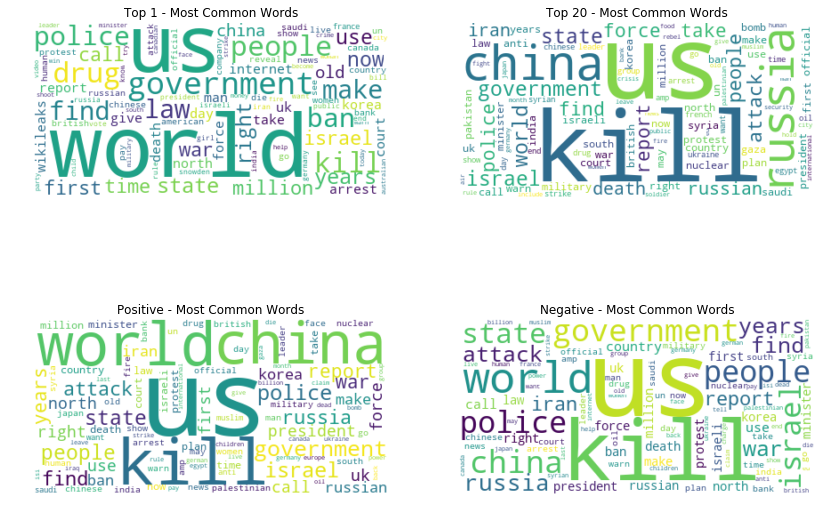

In [91]:
# Visualizing desired word clouds
f, axarr = plt.subplots(2,2, figsize=[14, 10])
axarr[0,0].imshow(wordcloud(top1), interpolation='bilinear')
axarr[0,1].imshow(wordcloud(top20), interpolation='bilinear')
axarr[1,0].imshow(wordcloud(positive), interpolation='bilinear')
axarr[1,1].imshow(wordcloud(negative), interpolation='bilinear')

axarr[0, 0].axis("off")
axarr[0, 1].axis("off")
axarr[1, 0].axis("off")
axarr[1, 1].axis("off")

axarr[0, 0].set_title("Top 1 - Most Common Words")
axarr[0, 1].set_title("Top 20 - Most Common Words")
axarr[1, 0].set_title("Positive - Most Common Words")
axarr[1, 1].set_title("Negative - Most Common Words")
plt.show()

### Commentary

Most of the frequent words and themes across top and low ranked headlines, along with headlines on positive and negative performing days, remain fairly consistent. Top1 sees the themes of international politics and conflicts, with words such as "US", "government", "world", "china", "war", "israel" - but also internal issues such as "police", "drug", "ban", "law", "right". Top 20 sees a heavier emhasis on international affairs and conflicts, with words such as "US", "China", "russia", "kill", "state", "force", "iran", "death", "attack", "israel", "government", and "police". There seems to be no major difference between common words that appear between positive and negative days.